In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
file_path = "../Resources/Original_Data.csv"
original_df = pd.read_csv(file_path)
original_df.head()


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,...,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,...,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,...,NaN,2014-07-23,2011-08,2014-07-23,2,1,2,0,0,0
2,3,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25 14:08:01,2011-08,2014-07-23,0,1,1,0,0,0
3,4,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,...,NaN,2018-09-04 16:14:36,2017-03,2018-09-06,0,1,1,0,0,0
4,5,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,...,NaN,2018-04-25 14:08:01,2009-10,2014-05-14,0,1,1,0,0,0


In [2]:
project_data = original_df[["pl_name", "hostname", "disc_year", "sy_snum", "sy_pnum", "pl_rade", "pl_masse", "pl_dens", "pl_orbper", "pl_orbsmax", "pl_eqt", "st_teff", "st_rad", "st_mass", "st_dens","st_logg", "st_vsin", "sy_dist", "pl_rvamp"]]
project_data.head()

,pl_name,hostname,disc_year,sy_snum,sy_pnum,pl_rade,pl_masse,pl_dens,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,st_mass,st_dens,st_logg,st_vsin,sy_dist,pl_rvamp
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.03000,1.29,NaN,4742.0,19.00,2.70,NaN,2.31,1.2,93.1846,302.8
1,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,NaN,1.21,NaN,NaN,NaN,2.60,NaN,NaN,NaN,93.1846,NaN
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.51,NaN,NaN,NaN,1.70,NaN,NaN,NaN,125.3210,NaN
3,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,516.21997,1.53,NaN,4213.0,29.79,2.78,NaN,1.93,NaN,125.3210,189.7
4,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,516.22000,1.54,NaN,4340.0,24.08,1.80,NaN,1.60,1.5,125.3210,189.7


In [3]:
no_dup_data = project_data.drop_duplicates(subset = ["pl_name"])
no_dup_data

,pl_name,hostname,disc_year,sy_snum,sy_pnum,pl_rade,pl_masse,pl_dens,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,st_mass,st_dens,st_logg,st_vsin,sy_dist,pl_rvamp
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.030000,1.290000,NaN,4742.0,19.00,2.7,NaN,2.31,1.2,93.1846,302.80
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.510000,NaN,NaN,NaN,1.7,NaN,NaN,NaN,125.3210,NaN
5,14 And b,14 And,2008,1,1,NaN,NaN,NaN,185.840000,0.830000,NaN,4813.0,11.00,2.2,NaN,2.63,2.6,75.4392,100.00
7,14 Her b,14 Her,2002,1,1,NaN,NaN,NaN,NaN,2.730000,NaN,NaN,NaN,0.9,NaN,NaN,NaN,17.9323,NaN
13,16 Cyg B b,16 Cyg B,1996,3,1,NaN,NaN,NaN,800.800000,1.600000,NaN,5760.0,NaN,1.0,NaN,4.35,2.7,21.1397,43.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26809,tau Gem b,tau Gem,2013,1,1,NaN,NaN,NaN,305.500000,1.170000,NaN,4388.0,26.80,2.3,NaN,1.96,1.0,112.5370,350.20
26811,ups And b,ups And,1996,2,3,NaN,NaN,NaN,4.617033,0.059222,NaN,NaN,1.56,1.3,NaN,NaN,NaN,13.4054,70.51
26816,ups And c,ups And,1999,2,3,NaN,NaN,NaN,238.100000,0.821000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4054,63.00
26820,ups And d,ups And,1999,2,3,NaN,NaN,NaN,1274.600000,2.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4054,64.10


In [4]:
no_dup_data.dropna()

,pl_name,hostname,disc_year,sy_snum,sy_pnum,pl_rade,pl_masse,pl_dens,pl_orbper,pl_orbsmax,pl_eqt,st_teff,st_rad,st_mass,st_dens,st_logg,st_vsin,sy_dist,pl_rvamp
206,CoRoT-22 b,CoRoT-22,2014,1,1,4.880,12.20000,0.249,9.755980,0.09200,885.0,5939.0,1.14,1.10,1.027,4.36,4.00,627.158,3.70
341,EPIC 246851721 b,EPIC 246851721,2018,2,1,11.781,953.49000,3.100,6.180235,0.07229,1401.0,6202.0,1.59,1.32,0.465,4.16,74.92,372.632,270.00
343,EPIC 249893012 b,EPIC 249893012,2020,1,3,1.950,8.75000,6.390,3.595100,0.04700,1616.0,5430.0,1.71,1.05,0.298,3.99,2.10,321.296,3.55
344,EPIC 249893012 c,EPIC 249893012,2020,1,3,3.670,14.67000,1.620,15.624000,0.13000,990.0,5430.0,1.71,1.05,0.298,3.99,2.10,321.296,3.66
345,EPIC 249893012 d,EPIC 249893012,2020,1,3,3.940,10.18000,0.910,35.747000,0.22000,752.0,5430.0,1.71,1.05,0.298,3.99,2.10,321.296,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26656,WASP-92 b,WASP-92,2016,1,1,16.376,255.85315,0.346,2.174674,0.03480,1871.0,6280.0,1.34,1.19,0.697,4.26,5.73,575.889,111.60
26658,WASP-93 b,WASP-93,2016,1,1,17.901,467.21010,0.479,2.732532,0.04211,1942.0,6700.0,1.52,1.33,0.530,4.20,37.00,370.284,174.00
26660,WASP-94 A b,WASP-94 A,2014,2,2,19.280,143.65300,0.118,3.950191,0.05500,1604.0,6153.0,1.62,1.45,0.485,4.18,4.20,211.211,45.40
26669,WASP-97 b,WASP-97,2014,1,1,12.670,419.52000,1.210,2.072760,0.03303,1555.0,5640.0,1.06,1.12,1.310,4.43,1.10,151.068,194.50


In [5]:
rename_df = no_dup_data.rename(columns = {"pl_name": "Planet_Name", "hostname": "Star_Name", "disc_year": "Discover_Year", "sy_snum": "Number_of_Stars", "sy_pnum": "Number_of_Planets", "pl_rade": "Planet_Radius", "pl_masse": "Planet_Mass", "pl_dens": "Planet_Density", "pl_orbper": "Planet_Orbital_Period(Days)", "pl_orbsmax": "Planet_Orbital_Semi_Major_Axis(au)", "pl_eqt": "Planet_Equilibrium_Temp(K)", "st_teff": "Stellar_Effective_Temp(K)", "st_rad": "Stellar_Radius", "st_mass": "Stellar_Mass", "st_dens": "Stellar_Density","st_logg":"Stellar Surface Gravity ", "st_vsin":"Stellar Rotational Velocity", "sy_dist": "System_Distance(pc)","pl_rvamp":"Radial Velocity Amplitude [m/s"})
rename_df

,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period(Days),Planet_Orbital_Semi_Major_Axis(au),Planet_Equilibrium_Temp(K),Stellar_Effective_Temp(K),Stellar_Radius,Stellar_Mass,Stellar_Density,Stellar Surface Gravity,Stellar Rotational Velocity,System_Distance(pc),Radial Velocity Amplitude [m/s
0,11 Com b,11 Com,2007,2,1,NaN,NaN,NaN,326.030000,1.290000,NaN,4742.0,19.00,2.7,NaN,2.31,1.2,93.1846,302.80
2,11 UMi b,11 UMi,2009,1,1,NaN,NaN,NaN,NaN,1.510000,NaN,NaN,NaN,1.7,NaN,NaN,NaN,125.3210,NaN
5,14 And b,14 And,2008,1,1,NaN,NaN,NaN,185.840000,0.830000,NaN,4813.0,11.00,2.2,NaN,2.63,2.6,75.4392,100.00
7,14 Her b,14 Her,2002,1,1,NaN,NaN,NaN,NaN,2.730000,NaN,NaN,NaN,0.9,NaN,NaN,NaN,17.9323,NaN
13,16 Cyg B b,16 Cyg B,1996,3,1,NaN,NaN,NaN,800.800000,1.600000,NaN,5760.0,NaN,1.0,NaN,4.35,2.7,21.1397,43.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26809,tau Gem b,tau Gem,2013,1,1,NaN,NaN,NaN,305.500000,1.170000,NaN,4388.0,26.80,2.3,NaN,1.96,1.0,112.5370,350.20
26811,ups And b,ups And,1996,2,3,NaN,NaN,NaN,4.617033,0.059222,NaN,NaN,1.56,1.3,NaN,NaN,NaN,13.4054,70.51
26816,ups And c,ups And,1999,2,3,NaN,NaN,NaN,238.100000,0.821000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4054,63.00
26820,ups And d,ups And,1999,2,3,NaN,NaN,NaN,1274.600000,2.510000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4054,64.10


In [6]:
test_df =rename_df.dropna()
test_df

,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period(Days),Planet_Orbital_Semi_Major_Axis(au),Planet_Equilibrium_Temp(K),Stellar_Effective_Temp(K),Stellar_Radius,Stellar_Mass,Stellar_Density,Stellar Surface Gravity,Stellar Rotational Velocity,System_Distance(pc),Radial Velocity Amplitude [m/s
206,CoRoT-22 b,CoRoT-22,2014,1,1,4.880,12.20000,0.249,9.755980,0.09200,885.0,5939.0,1.14,1.10,1.027,4.36,4.00,627.158,3.70
341,EPIC 246851721 b,EPIC 246851721,2018,2,1,11.781,953.49000,3.100,6.180235,0.07229,1401.0,6202.0,1.59,1.32,0.465,4.16,74.92,372.632,270.00
343,EPIC 249893012 b,EPIC 249893012,2020,1,3,1.950,8.75000,6.390,3.595100,0.04700,1616.0,5430.0,1.71,1.05,0.298,3.99,2.10,321.296,3.55
344,EPIC 249893012 c,EPIC 249893012,2020,1,3,3.670,14.67000,1.620,15.624000,0.13000,990.0,5430.0,1.71,1.05,0.298,3.99,2.10,321.296,3.66
345,EPIC 249893012 d,EPIC 249893012,2020,1,3,3.940,10.18000,0.910,35.747000,0.22000,752.0,5430.0,1.71,1.05,0.298,3.99,2.10,321.296,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26656,WASP-92 b,WASP-92,2016,1,1,16.376,255.85315,0.346,2.174674,0.03480,1871.0,6280.0,1.34,1.19,0.697,4.26,5.73,575.889,111.60
26658,WASP-93 b,WASP-93,2016,1,1,17.901,467.21010,0.479,2.732532,0.04211,1942.0,6700.0,1.52,1.33,0.530,4.20,37.00,370.284,174.00
26660,WASP-94 A b,WASP-94 A,2014,2,2,19.280,143.65300,0.118,3.950191,0.05500,1604.0,6153.0,1.62,1.45,0.485,4.18,4.20,211.211,45.40
26669,WASP-97 b,WASP-97,2014,1,1,12.670,419.52000,1.210,2.072760,0.03303,1555.0,5640.0,1.06,1.12,1.310,4.43,1.10,151.068,194.50


In [7]:
def earthradius(x):
    km = x * 6371
    return km
test_df["Planet_radius(km)"] = test_df["Planet_Radius"].apply(earthradius)

test_df

/Users/hanna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period(Days),Planet_Orbital_Semi_Major_Axis(au),Planet_Equilibrium_Temp(K),Stellar_Effective_Temp(K),Stellar_Radius,Stellar_Mass,Stellar_Density,Stellar Surface Gravity,Stellar Rotational Velocity,System_Distance(pc),Radial Velocity Amplitude [m/s,Planet_radius(km)
206,CoRoT-22 b,CoRoT-22,2014,1,1,4.880,12.20000,0.249,9.755980,0.09200,885.0,5939.0,1.14,1.10,1.027,4.36,4.00,627.158,3.70,31090.480
341,EPIC 246851721 b,EPIC 246851721,2018,2,1,11.781,953.49000,3.100,6.180235,0.07229,1401.0,6202.0,1.59,1.32,0.465,4.16,74.92,372.632,270.00,75056.751
343,EPIC 249893012 b,EPIC 249893012,2020,1,3,1.950,8.75000,6.390,3.595100,0.04700,1616.0,5430.0,1.71,1.05,0.298,3.99,2.10,321.296,3.55,12423.450
344,EPIC 249893012 c,EPIC 249893012,2020,1,3,3.670,14.67000,1.620,15.624000,0.13000,990.0,5430.0,1.71,1.05,0.298,3.99,2.10,321.296,3.66,23381.570
345,EPIC 249893012 d,EPIC 249893012,2020,1,3,3.940,10.18000,0.910,35.747000,0.22000,752.0,5430.0,1.71,1.05,0.298,3.99,2.10,321.296,1.97,25101.740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26656,WASP-92 b,WASP-92,2016,1,1,16.376,255.85315,0.346,2.174674,0.03480,1871.0,6280.0,1.34,1.19,0.697,4.26,5.73,575.889,111.60,104331.496
26658,WASP-93 b,WASP-93,2016,1,1,17.901,467.21010,0.479,2.732532,0.04211,1942.0,6700.0,1.52,1.33,0.530,4.20,37.00,370.284,174.00,114047.271
26660,WASP-94 A b,WASP-94 A,2014,2,2,19.280,143.65300,0.118,3.950191,0.05500,1604.0,6153.0,1.62,1.45,0.485,4.18,4.20,211.211,45.40,122832.880
26669,WASP-97 b,WASP-97,2014,1,1,12.670,419.52000,1.210,2.072760,0.03303,1555.0,5640.0,1.06,1.12,1.310,4.43,1.10,151.068,194.50,80720.570


The correlation between both factors is -0.04


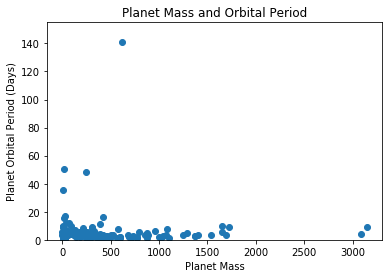

In [8]:
#Correlation between Planet Mass and Plantery Orbital Period


x_axis = test_df["Planet_Mass"]
y_axis = test_df["Planet_Orbital_Period(Days)"]


plt.scatter(x_axis,y_axis)

plt.xlabel("Planet Mass")
plt.ylabel("Planet Orbital Period (Days)")
plt.title("Planet Mass and Orbital Period")

plt.ylim(0,155)



correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Output_AY/Pmass_Porbit.png')

The correlation between both factors is -0.03


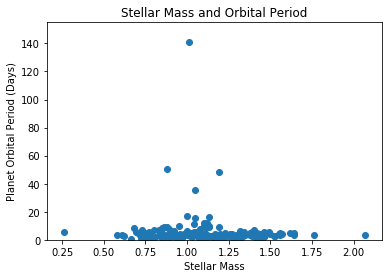

In [9]:
#Correlation between Stellar Mass and Planetary Orbiral Period

x_axis = test_df["Stellar_Mass"]
y_axis = test_df["Planet_Orbital_Period(Days)"]


plt.scatter(x_axis,y_axis)

plt.xlabel("Stellar Mass")
plt.ylabel("Planet Orbital Period (Days)")
plt.title("Stellar Mass and Orbital Period")

plt.ylim(0,155)



correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Output_AY/StMass_Porbit.png')

The correlation between both factors is 0.98


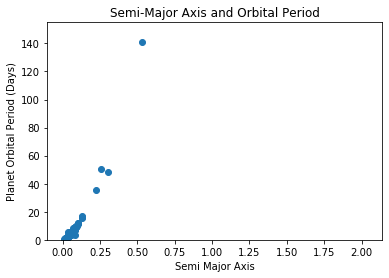

In [10]:
#Correlation between Planet Orbital semi major axis and Plantery Orbital Period 
#Planet Orbital Semi Major Axis is the distance the planet is from its star
x_axis = test_df["Planet_Orbital_Semi_Major_Axis(au)"]
y_axis = test_df["Planet_Orbital_Period(Days)"]


plt.scatter(x_axis,y_axis)

plt.xlabel("Semi Major Axis")
plt.ylabel("Planet Orbital Period (Days)")
plt.title("Semi-Major Axis and Orbital Period")

plt.ylim(0,155)



correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Output_AY/PMajorAxis_Porbit.png')

The correlation between both factors is -0.03


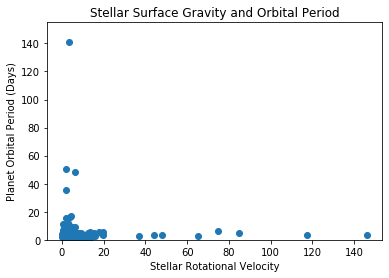

In [11]:
#Correlation between Stellar Rotational Velocity and Planetery Orbiral Period
x_axis = test_df["Stellar Rotational Velocity"]
y_axis = test_df["Planet_Orbital_Period(Days)"]


plt.scatter(x_axis,y_axis)

plt.xlabel("Stellar Rotational Velocity")
plt.ylabel("Planet Orbital Period (Days)")
plt.title("Stellar Surface Gravity and Orbital Period")

plt.ylim(0,155)



correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Output_AY/StRVelocity_Porbit.png')

The correlation between both factors is 0.01


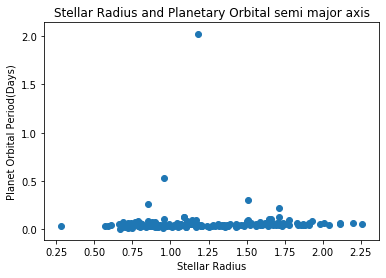

In [12]:
#Correlation between Stellar Radius and Planet orbiral semi-major axis
x_axis = test_df["Stellar_Radius"]
y_axis = test_df["Planet_Orbital_Semi_Major_Axis(au)"]


plt.scatter(x_axis,y_axis)

plt.xlabel("Stellar Radius")
plt.ylabel("Planet Orbital Period(Days)")
plt.title("Stellar Radius and Planetary Orbital semi major axis")




correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Output_AY/StRadius_PSemiMajorAxis.png')

The correlation between both factors is 0.51


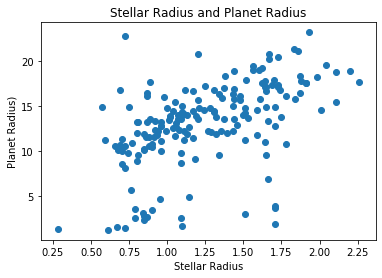

In [13]:
#Correlation between Stellar Radius and Planet Radius
x_axis = test_df["Stellar_Radius"]
y_axis = test_df["Planet_Radius"]


plt.scatter(x_axis,y_axis)

plt.xlabel("Stellar Radius")
plt.ylabel("Planet Radius)")
plt.title("Stellar Radius and Planet Radius")




correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Output_AY/StRadius_Pradius.png')

The correlation between both factors is -0.12


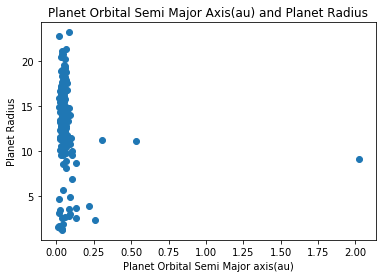

In [14]:
#Correlation betweeen Planetery Orbtial Semi major axis and Planet Radius
x_axis = test_df["Planet_Orbital_Semi_Major_Axis(au)"]
y_axis = test_df["Planet_Radius"]


plt.scatter(x_axis,y_axis)

plt.xlabel("Planet Orbital Semi Major axis(au)")
plt.ylabel("Planet Radius")
plt.title("Planet Orbital Semi Major Axis(au) and Planet Radius")




correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Output_AY/PSemiMajorAxis_Pradius.png')

The correlation between both factors is -0.09


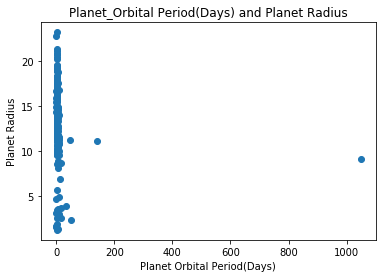

In [15]:
#Correlation between Planetery Orbital Period and Planet Radius
x_axis = test_df["Planet_Orbital_Period(Days)"]
y_axis = test_df["Planet_Radius"]


plt.scatter(x_axis,y_axis)

plt.xlabel("Planet Orbital Period(Days)")
plt.ylabel("Planet Radius")
plt.title("Planet_Orbital Period(Days) and Planet Radius")




correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Output_AY/Porbit_Pradius.png')

The correlation between both factors is 0.29


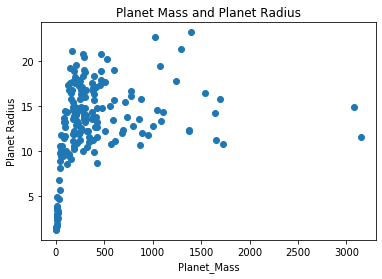

In [16]:
# Correlation between Planet Mass and Planet Radius 
x_axis = test_df["Planet_Mass"]
y_axis = test_df["Planet_Radius"]


plt.scatter(x_axis,y_axis)

plt.xlabel("Planet_Mass")
plt.ylabel("Planet Radius")
plt.title("Planet Mass and Planet Radius")




correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Output_AY/Pmass_Pradius.png')

The correlation between both factors is 0.29


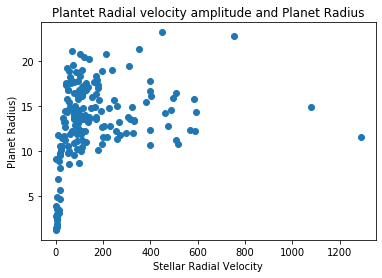

In [17]:
#Correlation between Planetary Radial Velocity and Planet Radius
x_axis = test_df["Radial Velocity Amplitude [m/s"]
y_axis = test_df["Planet_Radius"]


plt.scatter(x_axis,y_axis)

plt.xlabel("Stellar Radial Velocity")
plt.ylabel("Planet Radius)")
plt.title("Plantet Radial velocity amplitude and Planet Radius")




correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Output_AY/PradialVelocity_Pradius.png')

The correlation between both factors is 0.22


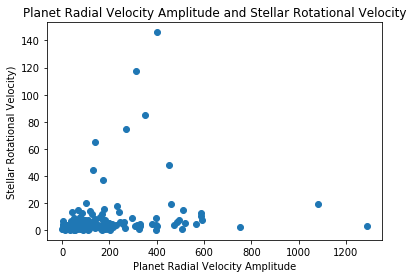

In [18]:
#Correlation between Planetary Radial Velocity and Sellar Radial Velocity 

x_axis = test_df["Radial Velocity Amplitude [m/s"]
y_axis = test_df["Stellar Rotational Velocity"]


plt.scatter(x_axis,y_axis)

plt.xlabel("Planet Radial Velocity Amplitude")
plt.ylabel("Stellar Rotational Velocity)")
plt.title("Planet Radial Velocity Amplitude and Stellar Rotational Velocity")




correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('Output_AY/PradialVelocity_StellarRotVelocity.png')